In [ ]:
import sys

sys.path.append(".../src")
sys.path.append(".../Bayer")
sys.path.append(".../Fuji")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import numpy as np
from scipy import ndimage
from skimage import io
from skimage import transform
from src.demosaicing import uniwersal_demosaic
from src.filters import fuji_filters, bayer_filters


(400, 600, 3)

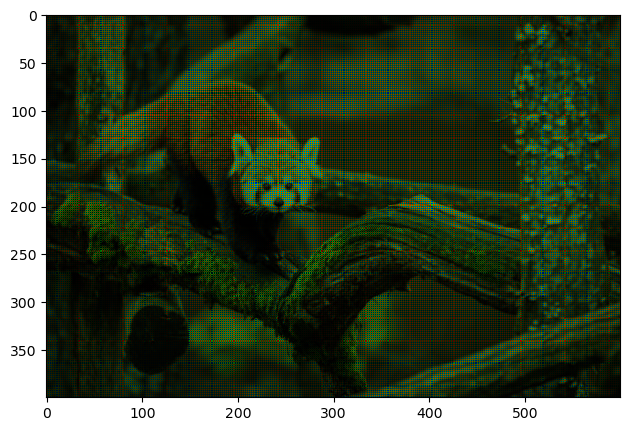

In [45]:
image = np.load("C:\\Users\\huber\\Desktop\\ISA\\Sem 3\\SIOC\\Lab 3\\Bayer\\pandas.npy")
io.imshow(image)
image.shape

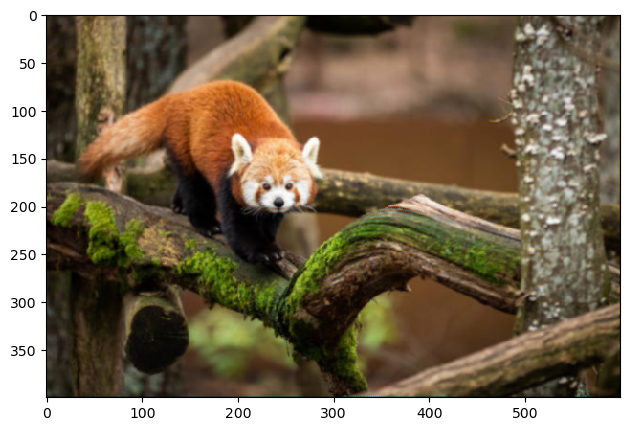

In [46]:
demo_image = uniwersal_demosaic(image, bayer_filters)
io.imshow(demo_image)

(360, 600, 3)

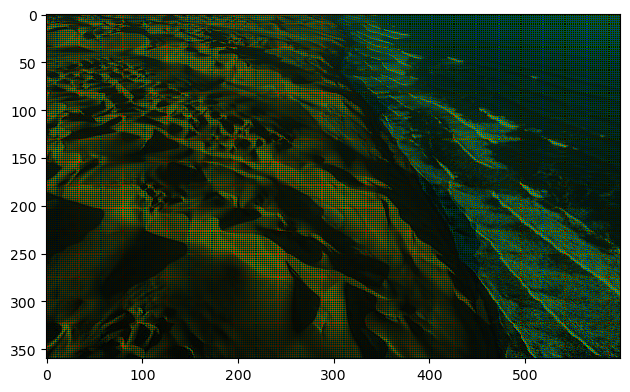

In [47]:
image = np.load("C:\\Users\\huber\\Desktop\\ISA\\Sem 3\\SIOC\\Lab 3\\Bayer\\namib.npy")
io.imshow(image)
image.shape

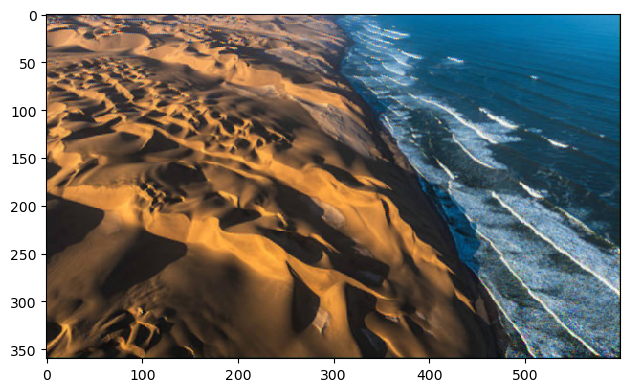

In [48]:
demo_image = uniwersal_demosaic(image, bayer_filters)
io.imshow(demo_image)

(300, 600, 3)

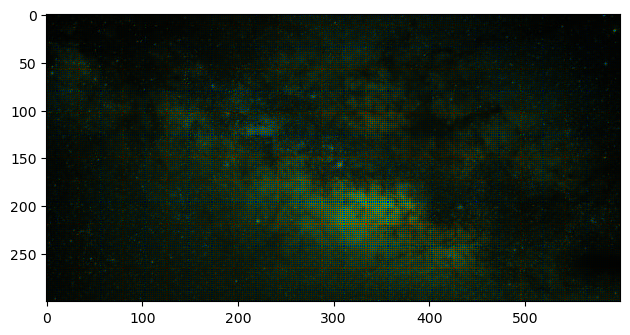

In [ ]:
image = np.load("C:\\Users\\huber\\Desktop\\ISA\\Sem 3\\SIOC\\Lab 3\\Bayer\\milky-way.npy")
io.imshow(image)
image.shape

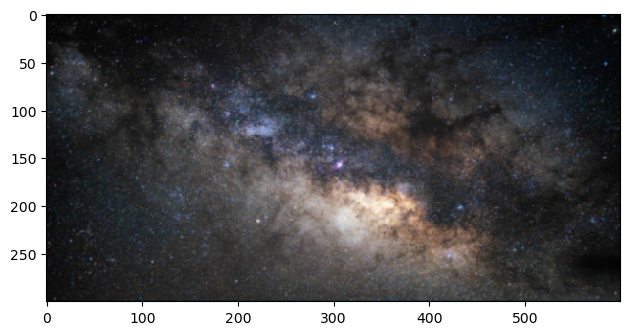

In [50]:
demo_image = uniwersal_demosaic(image, bayer_filters)
io.imshow(demo_image)

(300, 600, 3)

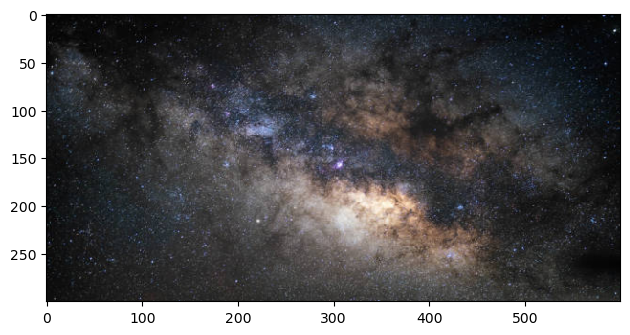

In [65]:
fuji_image = np.load("C:\\Users\\huber\\Desktop\\ISA\\Sem 3\\SIOC\\Lab 3\\Fuji\\milky-way.npy")
io.imshow(fuji_image)
fuji_image.shape